In [1]:
import sys

sys.path.append('../GraphStructureLearning')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

from glob import glob
import pickle
import yaml
from easydict import EasyDict as edict

from torch_geometric.utils import to_dense_adj, dense_to_sparse

In [3]:
adj_matrix = np.load('./data/METR-LA/adj_mat.npy')

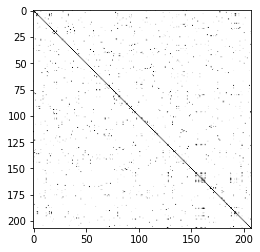

In [4]:
plt.imshow(adj_matrix, cmap='Greys')

In [5]:
exp_dirs = glob('./exp/METR_LA/*')
exp_dirs.sort()
exp_dirs

['./exp/METR_LA/GTS_METR_LA_0321_031950']

In [6]:
exp = exp_dirs[0]

In [7]:
config_file = glob(exp+'/*.yaml')[0]
config = edict(yaml.load(open(config_file, 'r'), Loader=yaml.FullLoader))

In [13]:
train_result_dirs = glob(exp+'/training_result.pickle')
train_result = pickle.load(open(train_result_dirs[0], 'rb'))

test_result_dirs = glob(exp+'/test_result.pickle')
test_result = pickle.load(open(test_result_dirs[0], 'rb'))

In [14]:
train_result.keys()

dict_keys(['train_loss', 'val_loss', 'val_adj_matirix'])

In [15]:
test_result.keys()

dict_keys(['test_loss', 'adj_matrix', 'prediction', 'target'])

In [89]:
learn_adj = to_dense_adj(test_result['adj_matrix'].detach().cpu())
learn_edge_index = test_result['adj_matrix'].detach().cpu()

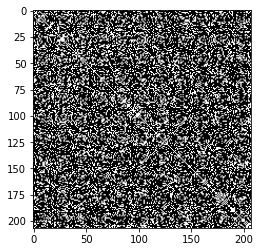

In [88]:
plt.imshow(learn_adj[0], cmap='Greys')

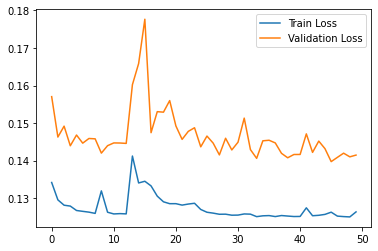

In [116]:
plt.plot(train_result['train_loss'], label='Train Loss')
plt.plot(train_result['val_loss'], label='Validation Loss')
plt.legend()

In [18]:
len(test_result['target'])

3426

In [19]:
test_result['target'][0].shape

torch.Size([207, 3])

In [105]:
targets = torch.stack(test_result['target'])
pred = torch.stack(test_result['prediction'])

In [106]:
pred = torch.swapaxes(pred, 0, 1)
targets = torch.swapaxes(targets, 0, 1)

In [107]:
pred.shape

torch.Size([207, 3426, 3])

In [98]:
pred[0][0].shape

torch.Size([3])

In [100]:
pred[0, : ,0].shape

torch.Size([3426])

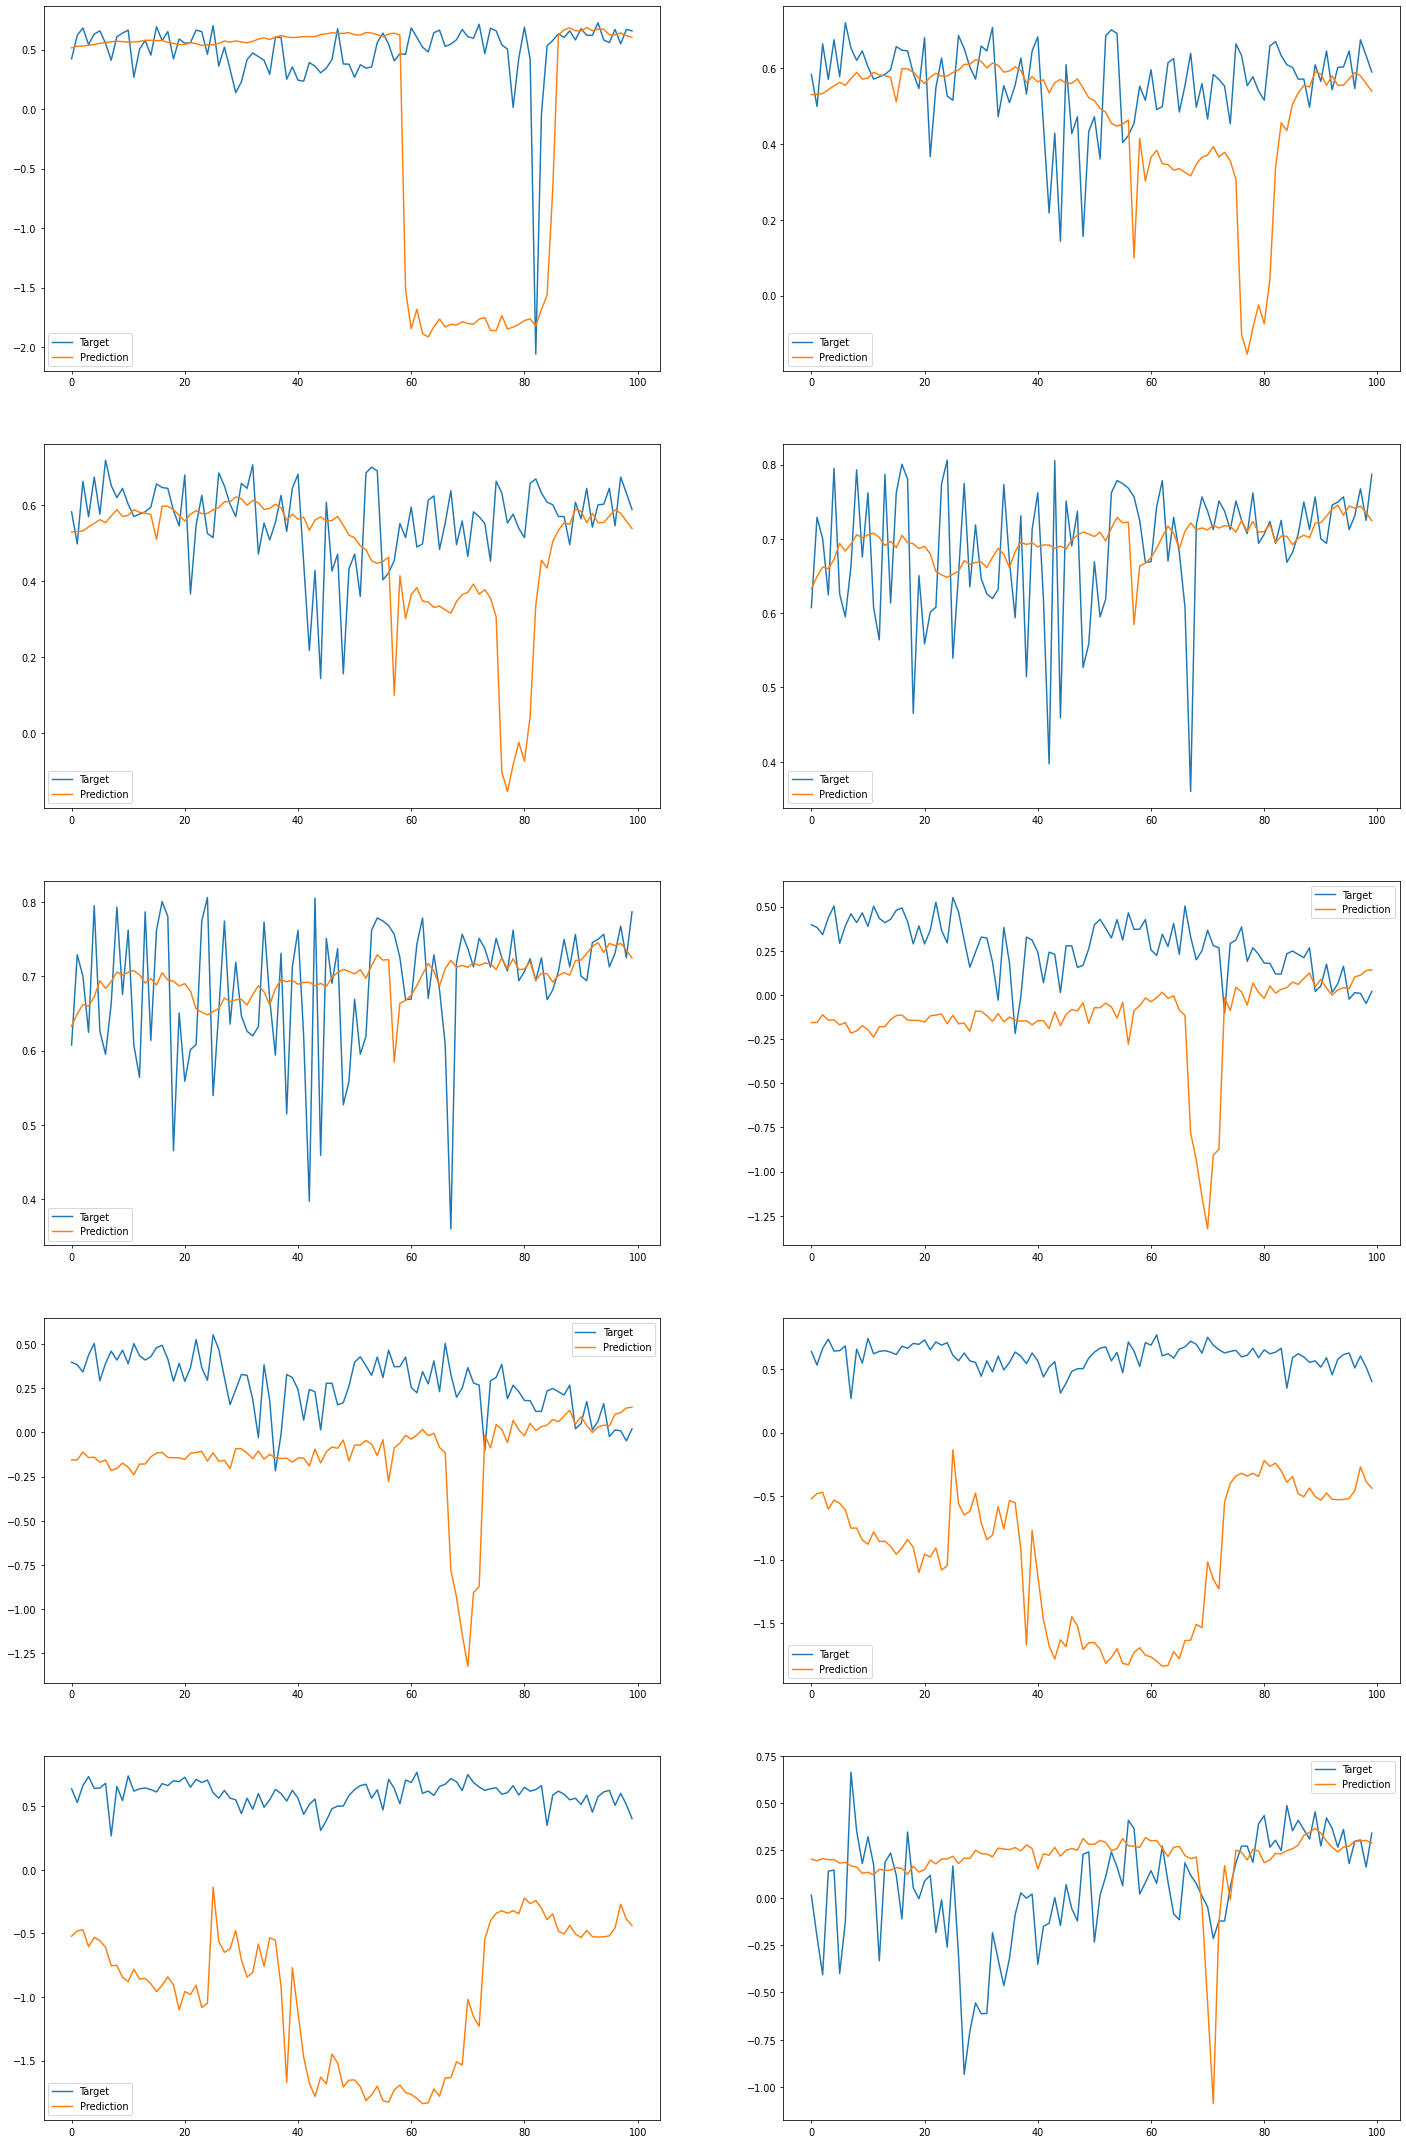

In [114]:
nrow = 5
ncol = 2

f, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(5*nrow, 20*ncol), dpi=70)

for ii in range(nrow):
    for jj in range(ncol):
        axes[ii,jj].plot(targets[ii+jj, 2000:2000+100, 0], label='Target')
        axes[ii,jj].plot(pred[ii+jj, 3000:3000+100, 0], label='Prediction')
        axes[ii,jj].legend()